# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Latifatuzikra Suhairi
- **Email:** latifatuzikra@gmail.com
- **ID Dicoding:** latifatuzikra


Analisis RFM (Recency, Frekuensi, Moneter) adalah pendekatan berbasis perilaku yang mengelompokkan pelanggan ke dalam segmen. Analisis RFM mempertimbangkan 3 hal berikut:
- Rencency : Seberapa baru pelanggan melakukan transaksi
- Frequency : Seberapa sering pelanggan melakukan transaksi
- Monetary : Seberapa banyak biaya yang dikeluarkan pelanggan untuk melakukan transaksi.

Analisis RFM bekerja dengan mempelajari data history pelanggan. Hal ini dapat membantu manajer untuk mengidentifikasi pelanggan potensial untuk bisnis yang lebih menguntukan.

Dalam studi kasus kali ini, penggunaan analisis RFM diharapkan mampu membantu Olist Store untuk menyaring pelanggan ke dalam berbagai kelompok pelanggan. Kelompok pelanggan ini selanjutnya digunakan oleh manajer untuk mengidentifikasi kelompok pelanggan mana yang dapat membuat bisnis Olist Store lebih menguntungkan.

## Menentukan Pertanyaan Bisnis
1. Bagaimana sebaran pelanggan Olist Store berdasarkan kota dan negara asalnya?
2. Kategori produk manakah yang paling sering dibeli dan paling jarang dibeli pelanggan?
3. Tipe pembayaran apa saja yang sering digunakan pelanggan untuk bertransaksi?
4. Bagaimana perkembangan jumlah order dari pelanggan dari tahun 2016-2018 setiap bulannya?
5. Bagaimana segmentasi pelanggan Olist Store berdasarkan nilai recency, frequency, dan monetary-nya?

## Import Semua Packages/Library yang Digunakan

In [1]:
# import semua library yang dibutuhkan
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

## Data Wrangling

### Gathering Data

In [2]:
# mengambil dan membaca data pada tabel customer
df_customers = pd.read_csv("https://raw.githubusercontent.com/latifatuzikra-suhairi/CRF-Analysis-On-Brazilian-E-Commerce-Dataset/main/Dataset/olist_customers_dataset.csv")
df_customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# membaca data pada tabel order items
df_order_items = pd.read_csv("https://raw.githubusercontent.com/latifatuzikra-suhairi/CRF-Analysis-On-Brazilian-E-Commerce-Dataset/main/Dataset/olist_order_items_dataset.csv")
df_order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
# membaca data pada tabel order
df_orders = pd.read_csv("https://raw.githubusercontent.com/latifatuzikra-suhairi/CRF-Analysis-On-Brazilian-E-Commerce-Dataset/main/Dataset/olist_orders_dataset.csv")
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# membaca data pada tabel payment
df_orders_payment = pd.read_csv("https://raw.githubusercontent.com/latifatuzikra-suhairi/CRF-Analysis-On-Brazilian-E-Commerce-Dataset/main/Dataset/olist_order_payments_dataset.csv")
df_orders_payment.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# membaca data pada tabel produk
df_products = pd.read_csv("https://raw.githubusercontent.com/latifatuzikra-suhairi/CRF-Analysis-On-Brazilian-E-Commerce-Dataset/main/Dataset/olist_products_dataset.csv")
df_products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
# membaca data pada tabel translate nama kategori produk
df_product_category_name_translation = pd.read_csv("https://raw.githubusercontent.com/latifatuzikra-suhairi/CRF-Analysis-On-Brazilian-E-Commerce-Dataset/main/Dataset/product_category_name_translation.csv")
df_product_category_name_translation.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### 1. Menilai Data Pada Tabel Customers

In [8]:
# mendapatkan informasi tabel customers
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


didapatkan informasi bahwa tabel customers terdiri dari 99441 baris data dengan lima atribut: customer_id dengan tipe data object, customer_unique_id dengan tipe data object, customer_zip_code_prefix dengan tipe data int, customer_city dengan tipe data object, customer_state dengan tipe data object.

In [9]:
# memeriksa apakah ada data yang hilang
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

didapatkan informasi bahwa tabel customers tidak memiliki data yang hilang

In [10]:
df_customers['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [11]:
print("Jumlah data duplikat pada tabel customers: ",df_customers.duplicated().sum())

Jumlah data duplikat pada tabel customers:  0


diketahui bahwa tabel customers tidak memiliki data yang duplikat

In [12]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


customer city masih menggunakan huruf lowercase dan customer state masih menggunakan akronim

#### 2. Menilai Data Pada Tabel Orders

In [13]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


didapatkan informasi bahwa tabel orders terdiri dari 99441 baris data dengan delapan atribut:
1. order_id dengan tipe data object
2. customer_id dengan tipe data object
3. order_status dengan tipe data object
4. order_purchase_timestamp dengan tipe data object
5. order_approved_at dengan tipe data object
6. order_delivered_carrier_date dengan tipe data object
7. order_delivered_customer_date dengan tipe data object
8. order_estimated_delivery_date dengan tipe data object

Dari delapan atribut tersebut, terdapat tiga atribut data yang memiliki _missing value_ yaitu:
1. atribut order_approved_at,
2. order_delivered_carrier_date,
3. order_delivered_customer_date

Kemudian, diketahui pula bahwa terdapat kesalahan penggunaan tipe data pada beberapa atribut, yang seharusnya menggunakan tipe data date time, yaitu:  
1. order_purchase_timestamp,
2. order_approved_at,
3. order_delivered_carrier_date,
4. order_delivered_customer_date,
5. order_estimated_delivery_date


In [14]:
# melihat apakah ada data pada tabel order yang bernilai nan
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dari delapan atribut tersebut, terdapat tiga atribut data yang memiliki _missing value_ yaitu:
1. order_approved_at sebanyak 160 baris
2. order_delivered_carrier_date sebanyak 1783 baris
3. order_delivered_customer_date sebanyak 2965 baris

Namun, _missing value_ tersebut tidak di proses karena data atribut tersebut, tidak digunakan dalam kebutuhan analisis

In [15]:
# melihat apakah ada data duplikat pada tabel order
print("Jumlah data duplikat pada tabel order: ",df_orders.duplicated().sum())

Jumlah data duplikat pada tabel order:  0


diketahui bahwa tabel order tidak memiliki data duplikat

In [16]:
# melihat deskripsi statistik pada tabel order
df_orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### 3. Menilai Data Pada Tabel Order Item

In [17]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


didapatkan informasi bahwa tabel orders item terdiri dari 99441 baris data dengan delapan atribut:
1. order_id dengan tipe data object
2. order_item_id dengan tipe data int64
3. product_id dengan tipe data object
4. seller_id dengan tipe data object
5. shipping_limit_date dengan tipe data object
6. price dengan tipe data float
7. freight_value dengan tipe data flat

Tipe data atribut shipping_limit_date perlu diubah menjadi datetime, karena belum sesuai dengan value yang disimpan pada atribut tersebut

In [18]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

didapatkan informasi bahwa tabel order items tidak memiliki _missing value_

In [19]:
df_order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [20]:
print("Jumlah data duplikat pada tabel order items: ",df_order_items.duplicated().sum())

Jumlah data duplikat pada tabel order items:  0


#### 4. Menilai Tabel Order Payments

In [21]:
df_orders_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


didapatkan informasi bahwa tabel orders payment terdiri dari 103886 baris data dengan 5 atribut:
1. order_id  dengan tipe data object
2. payment_sequential dengan tipe data int64
3. payment_type dengan tipe data object
4. payment_installments dengan tipe data int
5. payment_value dengan tipe data float


In [22]:
df_orders_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

diketahui tidak ada data yang _missing_

In [23]:
df_orders_payment.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [24]:
df_orders_payment['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

terdapat 5 tipe pembayaran: credit card, boleto, voucher, debit card, not defined

In [25]:
print("Jumlah data duplikat pada tabel order payment: ",df_orders_payment.duplicated().sum())

Jumlah data duplikat pada tabel order payment:  0


#### 5. Menilai Data Pada Tabel Products

In [26]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


didapatkan informasi bahwa tabel product terdiri dari 32951 baris data dengan 9 atribut: customer_id dengan tipe data object, customer_unique_id dengan tipe data object, customer_zip_code_prefix dengan tipe data int, customer_city dengan tipe data object, customer_state dengan tipe data object.
product_id, product_category_name, product_name_lenght,  product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm

In [27]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

diketahui bawha terdapat nilai _missing value_ pada tabel products, yaitu pada atribut:
1. product_category_name dengan 610 data _missing_
2. product_name_lenght dengan 610 data _missing_
3. product_description_lengh dengan 610 data _missing_
4. product_photos_qty dengan 610 data _missing_



In [28]:
print("Jumlah data duplikat pada tabel products: ",df_products.duplicated().sum())

Jumlah data duplikat pada tabel products:  0


In [29]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Kolom product_name_length sampai dengan product_width_cm tidak akan dibutuhkan, sehingga kolom tersebut akan dihapus.

In [30]:
df_products['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

#### 6. Menilai Data Pada Tabel Product Category Translate

In [31]:
df_product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


diketahui terdapat 71 data pada tabel Product Category Translate dengan dua atribut: product category name dan product category name english. Penulisan product_category_name_english masih menggunakan lowercase dan separator underscore ("_").

In [32]:
df_product_category_name_translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

diketahui tidak ada _missing value_ pada tabel Product Category Translate

In [33]:
df_product_category_name_translation['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

terdapat nama kategori product yang ada pada tabel product, tetapi belum terdaftar di tabel product category name translate, sehingga harus ditambahkan

### Cleaning Data

#### 1. Cleaning Data Tabel Customers

In [34]:
# mengubah akronim city state menjadi kepanjangannnya.
# data singkatan nama negara brazilian didapat dari https://id.wikipedia.org/wiki/Negara_bagian_di_Brasil
brazilian_state = {"AC" : "Acre",
                   "AL" : "Alagos",
                   "AP" : "Amapa",
                   "AM" : "Amazonas",
                   "BA" : "Bahia",
                   "CE" : "Ceara",
                   "DF" : "Distrito Fedderal",
                   "ES" : "Espirito Santo",
                   "GO" : "Goias",
                   "MA" : "Maranhao",
                   "MT" : "Mato Grosso",
                   "MS" : "Mato Grosso do Sul",
                   "MG" : "Minas Gerais",
                   "PA" : "Para",
                   "PB" : "Paraiba",
                   "PR" : "Parana",
                   "PE" : "Pernambuco",
                   "PI" : "Piaui",
                   "RJ" : "Rio de Janeiro",
                   "RN" : "Rio Grande do Sul",
                   "RO" : "Rondonia",
                   "RR" : "Roraima",
                   "RS" : "Rio Grande do Sul",
                   "SC" : "Santa Catarina",
                   "SP" : "Sao Paulo",
                   "SE" : "Sergipe",
                   "TO" : "Tocantins"
                   }

df_customers['customer_state'] = df_customers['customer_state'].map(brazilian_state)

In [35]:
# mengubah data customer_city menjadi huruf kapital
df_customers['customer_city'] = df_customers['customer_city'].str.title()
df_customers['customer_city'].head()

0                   Franca
1    Sao Bernardo Do Campo
2                Sao Paulo
3          Mogi Das Cruzes
4                 Campinas
Name: customer_city, dtype: object

In [36]:
# menghapus kolom customer_zip_code_prefix yang tidak digunakan
df_customers.drop(columns=['customer_zip_code_prefix'], inplace=True)
df_customers.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,Franca,Sao Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,Sao Bernardo Do Campo,Sao Paulo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,Sao Paulo,Sao Paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,Mogi Das Cruzes,Sao Paulo
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,Campinas,Sao Paulo


#### 2. Cleaning Data Pada Tabel Orders

In [37]:
# mengubah tipe data yang tidak sesuai
datetime_col = ["order_purchase_timestamp","order_approved_at", "order_delivered_carrier_date",
                "order_delivered_customer_date", "order_estimated_delivery_date"]

for col in datetime_col:
  df_orders[col] = pd.to_datetime(df_orders[col])

In [38]:
# melihat perubahan tipe data pada lima kolom tsb
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [39]:
#cek data nan
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

nilai nan tidak di handling karena kemungkinan terjadi karena order status yang belum delivered atau selesai

#### 3. Cleaning Pada Table Order Item

In [40]:
# mengubah tipe data shipping_limit_date menjadi datetime
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

In [41]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [42]:
# menghapus atribut seller_id karena tidak dibutuhkan
df_order_items.drop(columns=['seller_id'], inplace=True)

In [43]:
# menambahkan kolom baru bernama total_order yang merupakan hasil penjumlahan column price + freight_value
df_order_items.insert(6, 'total_order', df_order_items['price'] + df_order_items['freight_value'])
df_order_items.head()

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,total_order
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14,218.04


total harga yang harus dibayarkan pelanggan adalah nilai price ditambah dengan freight value (biaya ongkos kirim), sehingga perlu dibuatkan sebuah kolom baru yang menyimpan nilai total harga orderan pelanggan

#### 4. Cleaning Data Pada Tabel Product Category Name

In [44]:
# menambahkan data yang tidak ada di dalam tabel translate
new_data =[{'product_category_name': 'pc_gamer', 'product_category_name_english': 'pc_gaming'}, {'product_category_name': 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english': 'portable_kitchen_and_food_preparers'}]
df_product_category_name_translation = df_product_category_name_translation.append(new_data, ignore_index=True)
df_product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gaming


produk dengan kategori pc_gamer dan portateis_cozinha_e_preparadores_de_alimentos terdapat pada data di tabel produk, namun tidak terdaftar pada tabel product category name translate, sehingga dua kategori ini harus ditambahkan pada tabelproduct category name translate beserta translate bahasa inggrisnya

In [45]:
# kapitalisasi dan menghapus underscore antar kata
for i in range (len(df_product_category_name_translation)):
  df_product_category_name_translation.iloc[i, 1] = " ".join(df_product_category_name_translation.iloc[i, 1].split("_"))

df_product_category_name_translation['product_category_name_english'] = df_product_category_name_translation['product_category_name_english'].str.title()

kapitalisasi dan menghapus underscore antar kata digunakan untuk standarisasi nama kategori produk, agar pembaca visualisasi kita nantinya lebih mudah memahami makna visualisasi yang ingin disampaikan

#### 5. Cleaning Data Pada Tabel **Product**

In [46]:
# menghapus atribut tabel products yang tidak digunakan
df_products.drop(columns=['product_name_lenght', 'product_description_lenght',
                            "product_photos_qty","product_weight_g", "product_length_cm", "product_height_cm",
                            "product_width_cm"], inplace=True)

In [47]:
# mengganti nama kategori produk dengan bahasa inggris menggunakan data dari tabel product category translate
for i in range(len(df_products)):
  for j in range(len(df_product_category_name_translation)):
    if (df_products['product_category_name'][i] == df_product_category_name_translation['product_category_name'][j]):
      df_products['product_category_name'][i] = df_product_category_name_translation['product_category_name_english'][j]

In [48]:
# mengganti nama kategori produk bernilai nan dengan "Others"
df_products['product_category_name'].fillna('Others', inplace=True)

data produk dengan nilai kategori produk adalah NaN selanjutnya dikategorikan sebagai produk berkategori "Others"

In [49]:
# melihat nama kategori produk yang telah berhasil diubah ke bahasa inggris
df_products['product_category_name'].head()

0         Perfumery
1               Art
2    Sports Leisure
3              Baby
4        Housewares
Name: product_category_name, dtype: object

In [50]:
# periksa nilai nan pada data products
df_products.isna().sum()

product_id               0
product_category_name    0
dtype: int64

#### 6. Cleaning Data Tabel Payment

In [51]:
# menghapus columns yang tidak digunakan
df_orders_payment.drop(columns=["payment_sequential", "payment_installments", "payment_value"], inplace=True)

In [52]:
# kapitalisasi dan menghapus underscore antar kata pada data payment_type
for i in range (len(df_orders_payment)):
  df_orders_payment.iloc[i, 1] = " ".join(df_orders_payment.iloc[i, 1].split("_"))

df_orders_payment['payment_type'] = df_orders_payment['payment_type'].str.title()

kapitalisasi dan menghapus underscore antar kata digunakan untuk standarisasi nama tipe pembayaran, agar pembaca visualisasi kita nantinya lebih mudah memahami makna visualisasi yang ingin disampaikan

#### 7. Merge Table

In [53]:
# Left join data pada tabel orders, tabel customer, dan tabel payment untuk mengambil seluruh data customer yang pernah melakukan transaksi beserta data transaksinya dan tipe pembayaran yang digunakan
df_cust_order_pay = pd.merge(
    left = pd.merge(left=df_orders,
              right=df_customers,
              how="left",
              left_on="customer_id",
              right_on="customer_id"),
    right=df_orders_payment,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

print("Ukuran data df_cust_order_pay: ", df_cust_order_pay.shape)
df_cust_order_pay.head()

Ukuran data df_cust_order_pay:  (103887, 12)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,Sao Paulo,Credit Card
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,Sao Paulo,Voucher
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,Sao Paulo,Voucher
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,Barreiras,Bahia,Boleto
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,Vianopolis,Goias,Credit Card


In [54]:
# join tabel df_order_items, df_products
df_items_prod = pd.merge(left = df_order_items, right=df_products,
                         how="left",left_on="product_id",right_on="product_id")

print("Ukuran data df_items_prod: ", df_items_prod.shape)
df_items_prod.head()

Ukuran data df_items_prod:  (112650, 8)


,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,total_order,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,72.19,Cool Stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93,259.83,Pet Shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87,216.87,Furniture Decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79,25.78,Perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14,218.04,Garden Tools


In [55]:
# join kedua df_cust_order_pay dan df_items_prod
df_all = pd.merge(
    left=df_cust_order_pay,
    right=df_items_prod,
    how="right",
    left_on="order_id",
    right_on="order_id"
)
print("Ukuran data df_all: ", df_all.shape)
df_all.head()

Ukuran data df_all:  (117604, 19)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_type,order_item_id,product_id,shipping_limit_date,price,freight_value,total_order,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,Campos Dos Goytacazes,Rio de Janeiro,Credit Card,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,72.19,Cool Stuff
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,Santa Fe Do Sul,Sao Paulo,Credit Card,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93,259.83,Pet Shop
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,Para De Minas,Minas Gerais,Credit Card,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87,216.87,Furniture Decor
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,Atibaia,Sao Paulo,Credit Card,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79,25.78,Perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,Varzea Paulista,Sao Paulo,Credit Card,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14,218.04,Garden Tools


In [56]:
# cek data apakah ada yang null
df_all.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
customer_unique_id                  0
customer_city                       0
customer_state                      0
payment_type                        3
order_item_id                       0
product_id                          0
shipping_limit_date                 0
price                               0
freight_value                       0
total_order                         0
product_category_name               0
dtype: int64

In [57]:
# cek status order

df_all['order_status'].unique()

array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing',
       'approved', 'unavailable'], dtype=object)

In [58]:
'''mengambil data order yang hanya berstatus 'delivered', 'shipped', 'invoiced', 'processing','unavailable',
karena data order dengan status canceled dan unavailable dianggap tidak dibutuhkan untuk tujuan analisis'''

df_all = df_all[df_all["order_status"] != "canceled"]
df_all = df_all[df_all["order_status"] != "unavailable"]

In [59]:
df_all.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_type,order_item_id,product_id,shipping_limit_date,price,freight_value,total_order,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,Campos Dos Goytacazes,Rio de Janeiro,Credit Card,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,72.19,Cool Stuff
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,Santa Fe Do Sul,Sao Paulo,Credit Card,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93,259.83,Pet Shop
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,Para De Minas,Minas Gerais,Credit Card,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87,216.87,Furniture Decor
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,Atibaia,Sao Paulo,Credit Card,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79,25.78,Perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,Varzea Paulista,Sao Paulo,Credit Card,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14,218.04,Garden Tools


In [60]:
df_all.to_csv("preprocessing_brazilian_ecommerce_olist_store.csv", index=False)

## Exploratory Data Analysis

#### Sebaran Customer Berdasarkan kota dan negara asal

In [61]:
customers_by_state = df_all.groupby(by="customer_state").agg(num_customer = ('customer_unique_id', 'nunique')).reset_index()
customers_by_state_desc = customers_by_state.sort_values(by=["num_customer"], ascending=False)
display(customers_by_state_desc.head(10))

,customer_state,num_customer
23,Sao Paulo,39747
19,Rio de Janeiro,12241
12,Minas Gerais,11134
18,Rio Grande do Sul,5704
15,Parana,4824
22,Santa Catarina,3501
4,Bahia,3244
6,Distrito Fedderal,2057
7,Espirito Santo,1950
8,Goias,1934


Pelanggan Olist Store paling banyak berasal dari negara Sao Paulo, yaitu sebanyak 39747 pelanggan

In [62]:
customers_by_city = df_all.groupby(by="customer_city").agg(num_customer = ('customer_unique_id', 'nunique')).reset_index()
customers_by_city_desc = customers_by_city.sort_values(by=["num_customer"], ascending=False)
display(customers_by_city_desc.head(10))

,customer_city,num_customer
3587,Sao Paulo,14761
3146,Rio De Janeiro,6545
452,Belo Horizonte,2641
557,Brasilia,2051
1141,Curitiba,1447
705,Campinas,1379
2955,Porto Alegre,1317
3238,Salvador,1199
1526,Guarulhos,1133
3419,Sao Bernardo Do Campo,891


Pelanggan Olist Store paling banyak berasal dari kota Sao Paulo, yaitu sebanyak 14761 pelanggan

#### Transaksi Berdasarkan Kategori Produk

In [63]:
# kategori produk yang paling sering dibeli
order_by_product_cat = df_all.groupby(by="product_category_name").agg(num_order = ('order_id', 'count'))
order_by_product_cat_desc = order_by_product_cat.sort_values(by=['num_order'], ascending=False).reset_index()
order_by_product_cat_desc.head(5)

,product_category_name,num_order
0,Bed Bath Table,11805
1,Health Beauty,9935
2,Sports Leisure,8893
3,Furniture Decor,8707
4,Computers Accessories,8036


kategori produk yang paling banyak dibeli pelanggan adalah produk berkategori Bed Bath Table dengan 11823 kali pesanan

In [64]:
# kategori produk yang paling jarang dibeli
order_by_product_cat_asc = order_by_product_cat.sort_values(by=['num_order'], ascending=True).reset_index()
order_by_product_cat_asc.head(5)

,product_category_name,num_order
0,Security And Services,2
1,Fashion Childrens Clothes,8
2,Pc Gaming,9
3,Cds Dvds Musicals,14
4,Portable Kitchen And Food Preparers,14


kategori produk yang paling sedikit dibeli pelanggan adalah produk berkategori Security and Services yang hanya 2 kali pesanan

#### Tipe Pembayaran Yang Digunakan

In [65]:
payment_by_order = df_all.groupby(by="payment_type").agg(num_order = ('order_id', 'nunique'))
payment_by_order_desc = payment_by_order.sort_values(by=['num_order'], ascending=False).reset_index()
payment_by_order_desc

,payment_type,num_order
0,Credit Card,75614
1,Boleto,19535
2,Voucher,3745
3,Debit Card,1515


terdapat empat tipe pembayaran di Olist Store, yaitu Credit Card, Boleto, Voucher, dan Debit Card. Credit Card merupakan tipe pembayaran yang paling banyak digunakan oleh pelanggan Olist Store dalam bertransaksi.

#### Perkembangan jumlah order dari pelanggan setiap bulannya pada tahun 2016-2018

In [66]:
# menambahkan kolom month order untuk menyimpan bulan order
df_all.insert(5,'month_order', df_all['order_purchase_timestamp'].dt.strftime('%m-%Y'))

In [67]:
# melakukan agregasi jumlah transaksi dan total nominal belanja yang terjadi tiap bulannya
order_by_month = df_all.resample(rule='M', on='order_purchase_timestamp').agg(num_order = ('order_id','nunique'), sum_total_order = ('total_order','sum')).reset_index()
order_by_month = order_by_month.rename(columns ={"order_purchase_timestamp":"month_order"})
order_by_month['month_order'] = order_by_month ['month_order'].dt.strftime('%m-%Y')
order_by_month.sort_values(by=['num_order'], ascending=False).head()

,month_order,num_order,sum_total_order
14,11-2017,7421,1214882.73
16,01-2018,7187,1145704.43
18,03-2018,7168,1201963.60
19,04-2018,6919,1195123.88
20,05-2018,6833,1188417.11


jumlah transaksi paling banyak terjadi pada rentang tahun 2016-2018 terjadi pada bulan november 2017 dengan jumlah 7421 pesanan dengan total nominal belanja adalah 1.214.882,73 real

### RFM Analysis

Analisis RFM (Recency, Frekuensi, Moneter) adalah pendekatan berbasis perilaku yang mengelompokkan pelanggan ke dalam segmen. Analisis RFM mempertimbangkan 3 hal berikut:
- Rencency : Seberapa baru pelanggan melakukan transaksi. Semakin kecil angkanya, menunjukkan pelanggan ybs aktif berbelanja
- Frequency : Seberapa sering pelanggan melakukan transaksi. Semakin besar angkanya, menunjukkan pelanggan ybs sering berbelanja
- Monetary : Seberapa banyak total uang yang dikeluarkan pelanggan untuk berbelanja. Semakin besar angkanya, menunjukkan pelanggan semakin banyak menghabiskan uang untuk berbelanja


In [68]:
# dataset baru untuk analisis RFM
df_rfm = df_all.groupby(by="customer_unique_id", as_index=False).agg(
          max_order_date = ('order_purchase_timestamp', 'max'), #ambil tanggal order terakhir pelanggan
          frequency =  ('order_id', 'nunique'),  #ambil frekuensi order pelanggan, disimpan sebagai nilai frequency
          monetary = ('total_order', 'sum') #ambil total nominal belanja pelanggan, disimpan sebagai nilai monetary
         )

recent_date_order = df_all['order_purchase_timestamp'].dt.date.max() #ambil data order terakhir kalinya

In [69]:
# membuat value recency
df_rfm['max_order_date'] = df_rfm['max_order_date'].dt.date #mengubah tipe data ke date
df_rfm.insert(1, 'recency', df_rfm['max_order_date'].apply(lambda max_order: (recent_date_order - max_order).days)) #selisih hari date order terkahir pelanggan ybs dengan date terakhir keseluruhan pelanggan
df_rfm.drop(columns=['max_order_date'], inplace=True)
df_rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89


## Visualization & Explanatory Analysis

### Bagaimana sebaran pelanggan Olist Store berdasarkan kota dan negara asalnya?

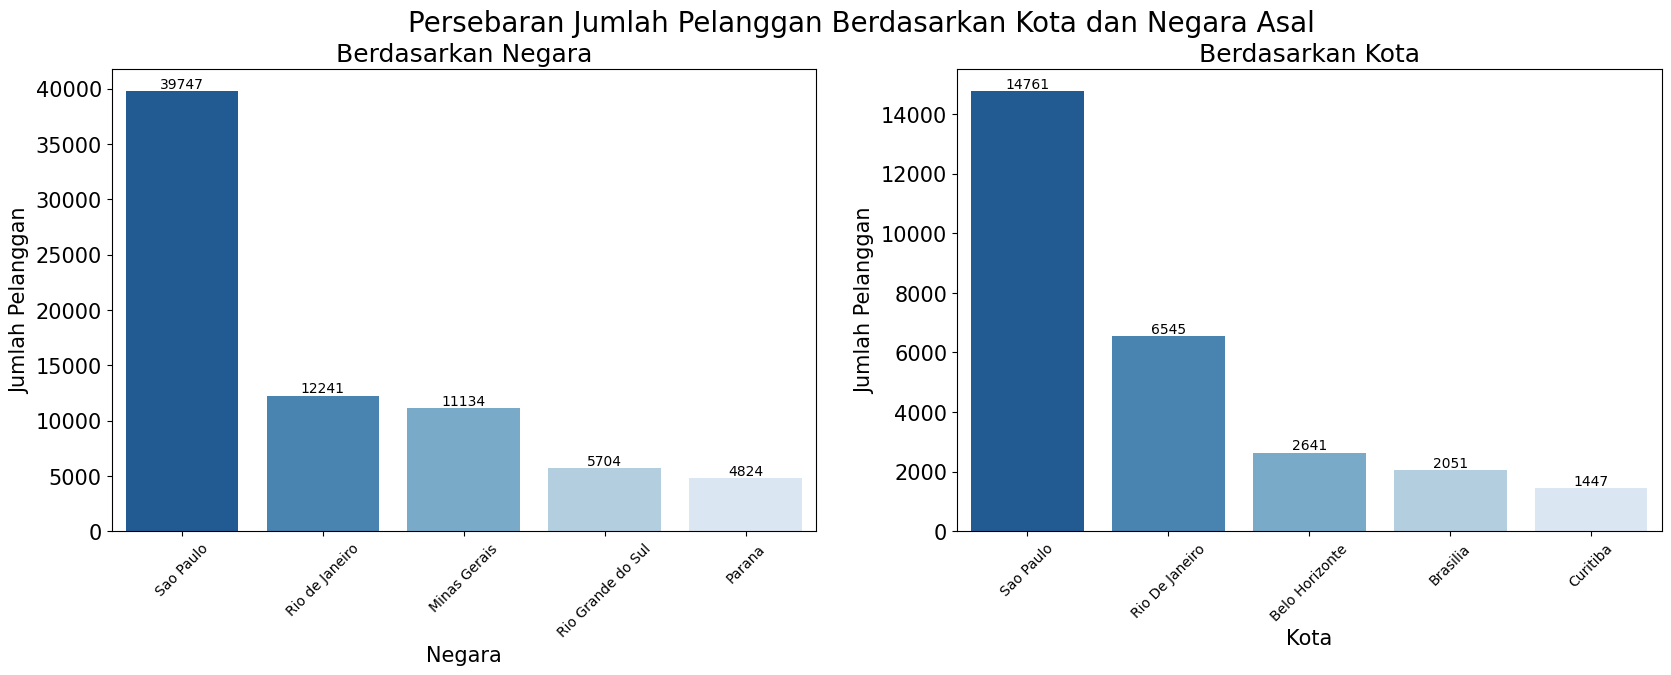

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.barplot(x="customer_state", y="num_customer", data=customers_by_state_desc.head(5), palette='Blues_r', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_ylabel("Jumlah Pelanggan", fontsize=15)
ax[0].set_xlabel("Negara", fontsize=15)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Berdasarkan Negara", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="customer_city", y="num_customer", palette='Blues_r', data= customers_by_city_desc.head(5), ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_ylabel("Jumlah Pelanggan", fontsize=15)
ax[1].set_xlabel("Kota", fontsize=15)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Berdasarkan Kota", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Persebaran Jumlah Pelanggan Berdasarkan Kota dan Negara Asal", fontsize=20)
plt.show()

Jika dilihat berdasarkan negara asal pelanggan, pelanggan Olist Store paling banyak berasal dari negara Sao Paulo dengan jumlah 39.747 pelanggan. Di urutan kedua diikuti oleh negara Rio de Janeiro dengan 12241 pelanggan. Urutan ketiga diikuti oleh negara Minas Gerais dengan 11.134 pelanggan. Jika dilihat berdasarkan kota asal pelanggan, pelanggan Olist Store paling banyak berasal dari kota Sao Paulo dengan 14.761 pelanggan. Posisi kedua terbanyak diikuti oleh kota Rip De Janeiro dengan 6.545 pelanggan dan posisi ketiga diikuti kota Belo Horizonte dengan 2.641 pelanggan.

### Kategori produk manakah yang paling sering dibeli dan paling jarang dibeli pelanggan?

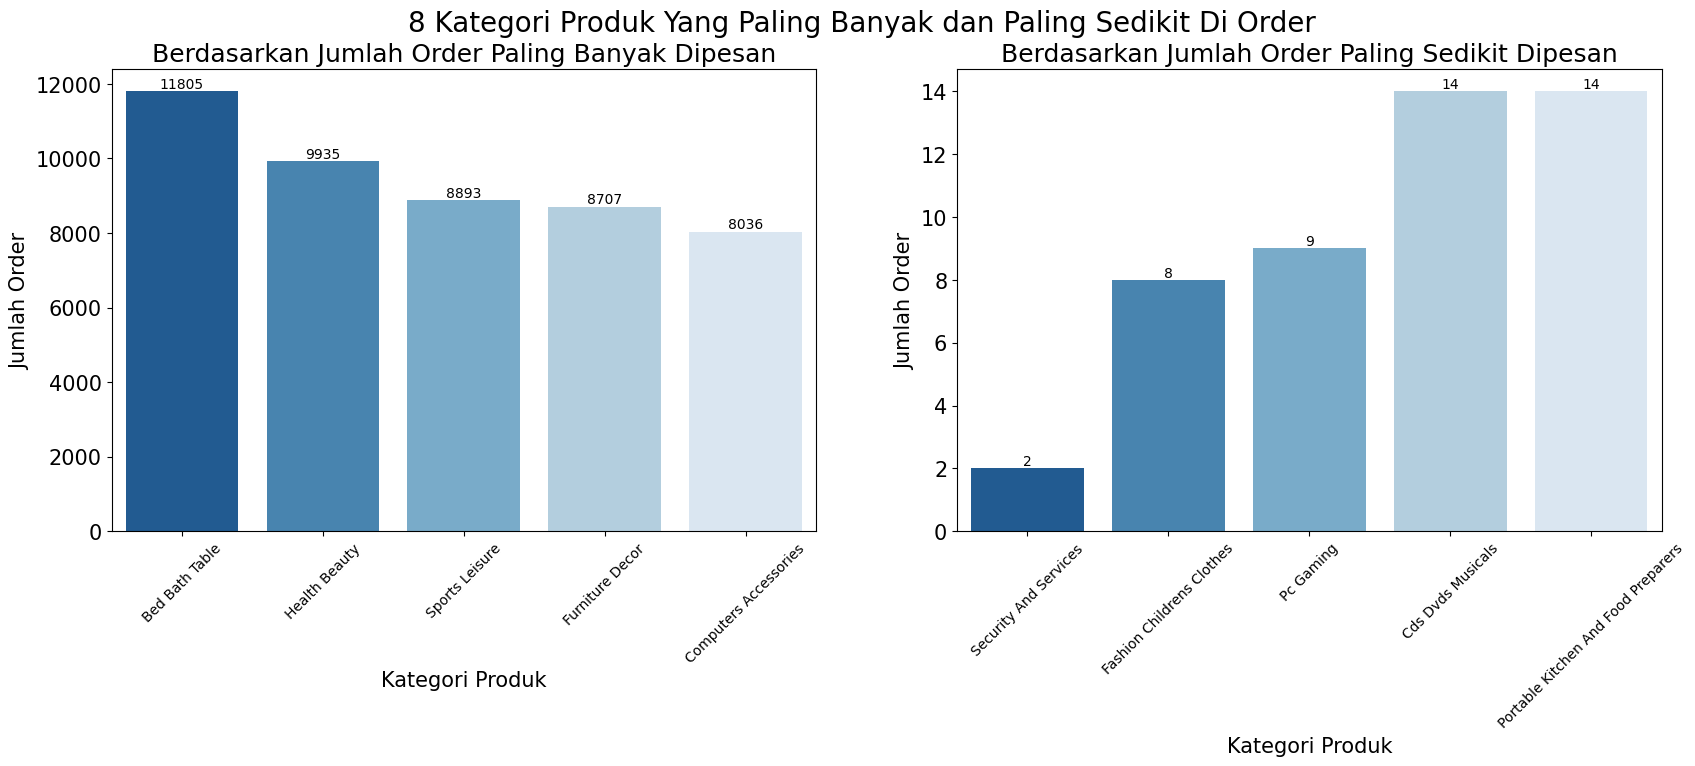

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.barplot(x="product_category_name", y="num_order", data=order_by_product_cat_desc.head(5), palette='Blues_r', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_ylabel("Jumlah Order", fontsize=15)
ax[0].set_xlabel("Kategori Produk", fontsize=15)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Berdasarkan Jumlah Order Paling Banyak Dipesan", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_category_name", y="num_order", palette='Blues_r', data= order_by_product_cat_asc.head(5), ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_ylabel("Jumlah Order", fontsize=15)
ax[1].set_xlabel("Kategori Produk", fontsize=15)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Berdasarkan Jumlah Order Paling Sedikit Dipesan", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("8 Kategori Produk Yang Paling Banyak dan Paling Sedikit Di Order", fontsize=20)
plt.show()

5 Kategori produk yang paling sering dibeli oleh pelanggan Olist Store secara berurut adalah Bed Bath Table dengan 11.805 kali pembelian, Health Beuaty dengan 9.935 kali pembelian, Sports Leisure dengan 8.893 kali pembelian, Furniture Decor dengan 8.707 kali pembelian, Computers Accessories dengan 8036 kali pembelian. Kemudian, 5 kategori produk yang paling sedikit dibeli oleh pelanggan Olist Store secara berurutan adalah Security and Services dengan hanya 2 kali pembelian, Fashion Childrens Clothes dengan 8 kali pembelian, PC Gaming dengan 9 kali pembelian, Cds Dvds Musicals dengan 14 kali pembelian, dan Portable Kitchen and Food Preparation dengan 14 kali pembelian.

### Tipe pembayaran apa saja yang sering digunakan pelanggan untuk bertransaksi?

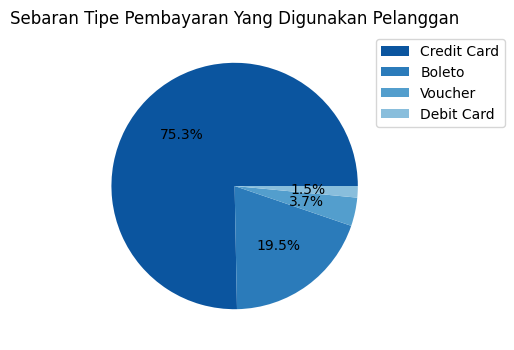

In [72]:
fig3, ax3 = plt.subplots(figsize=(4,4))
palette_color = sns.color_palette('Blues_r')
ax3.pie(payment_by_order_desc['num_order'], autopct='%1.1f%%', colors=palette_color)
ax3.legend(payment_by_order_desc['payment_type'], loc='upper right', bbox_to_anchor=(1.4, 1))
ax3.set_title('Sebaran Tipe Pembayaran Yang Digunakan Pelanggan')
plt.show()

Berdasarkan empat tipe pembayaran di Olist Store, 75,3% transaksi dibayar dengan menggunakan Credit Card, 19,5% transaksi dibayar dengan Boleto, 3,7% transaksi dibayar dengan Voucher, dan 1,5% transaksi dibayar dengan Debit Card dari 100.409 transaksi yang terjadi. Artinya, pelanggan Olist Store cenderung menggunakan Credit Card sebagai cara pembayaran mereka.

### Bagaimana perkembangan jumlah order pelanggan dari tahun 2016-2018 perbulannya?

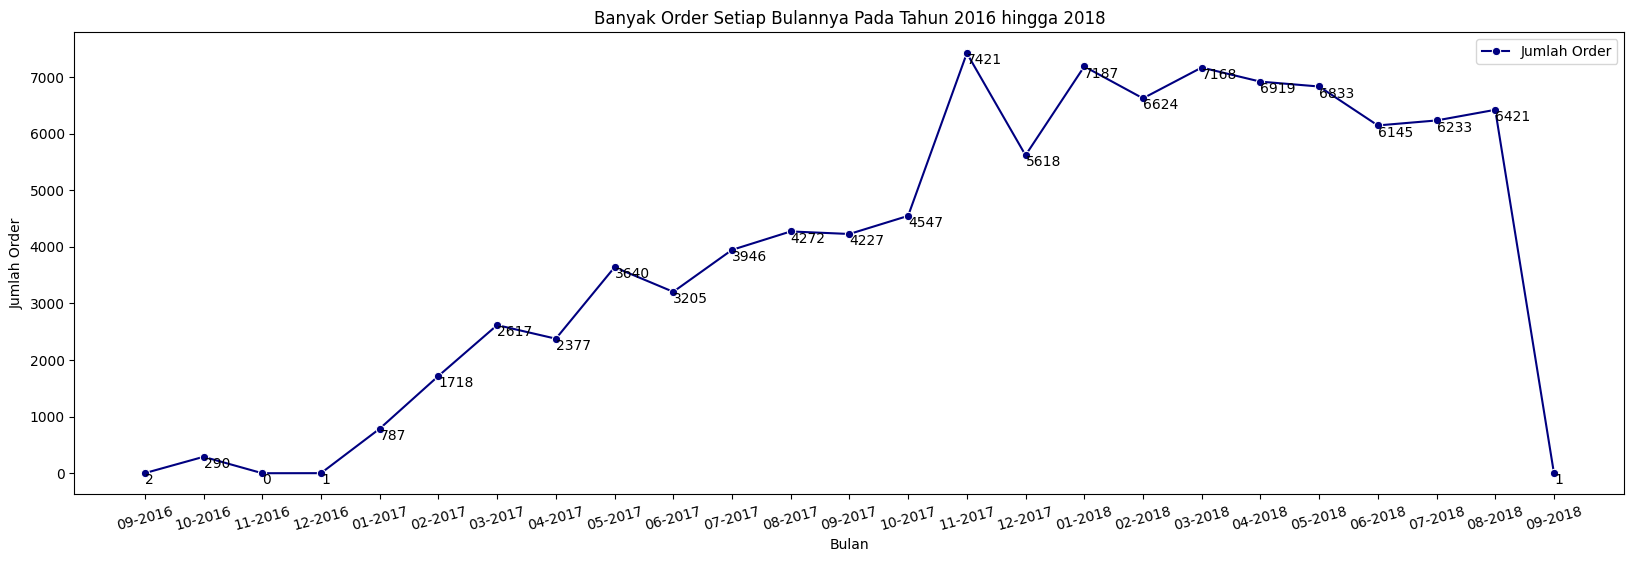

In [73]:
plt.figure(figsize=(20,6))
ax = sns.lineplot(x="month_order", y="num_order", data=order_by_month, marker='o', color='navy', label='Jumlah Order')

plt.title('Banyak Order Setiap Bulannya Pada Tahun 2016 hingga 2018')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.legend(loc='upper right')
plt.xticks(rotation=15)

for line in range(0, order_by_month.shape[0]):
     ax.text(order_by_month.month_order[line], order_by_month.num_order[line], order_by_month.num_order[line], horizontalalignment='left', verticalalignment='top', size='medium', color='black', weight='regular')

plt.show()

Jumlah order/transaksi pelanggan pada bulan September tahun 2016 hingga November tahun 2017 cenderung meningkat setiap bulannya. Sementara itu, jumlah order pada bulan Desember tahun 2017 hingga bulan September tahun 2018 mengalami fluktuasi yang cenderung stabil. Bulan November tahun 2017 mencapai jumlah order tertinggi dalam periode September tahun 2016 hingga September 2018 dengan total order sebesar 7.421 orderan. Sedangkan, total order terendah terjadi pada bulan November tahun 2016 dengan 0 orderan.

### Bagaimana segmentasi pelanggan Olist Store berdasarkan nilai recency, frequency, dan monetary-nya?

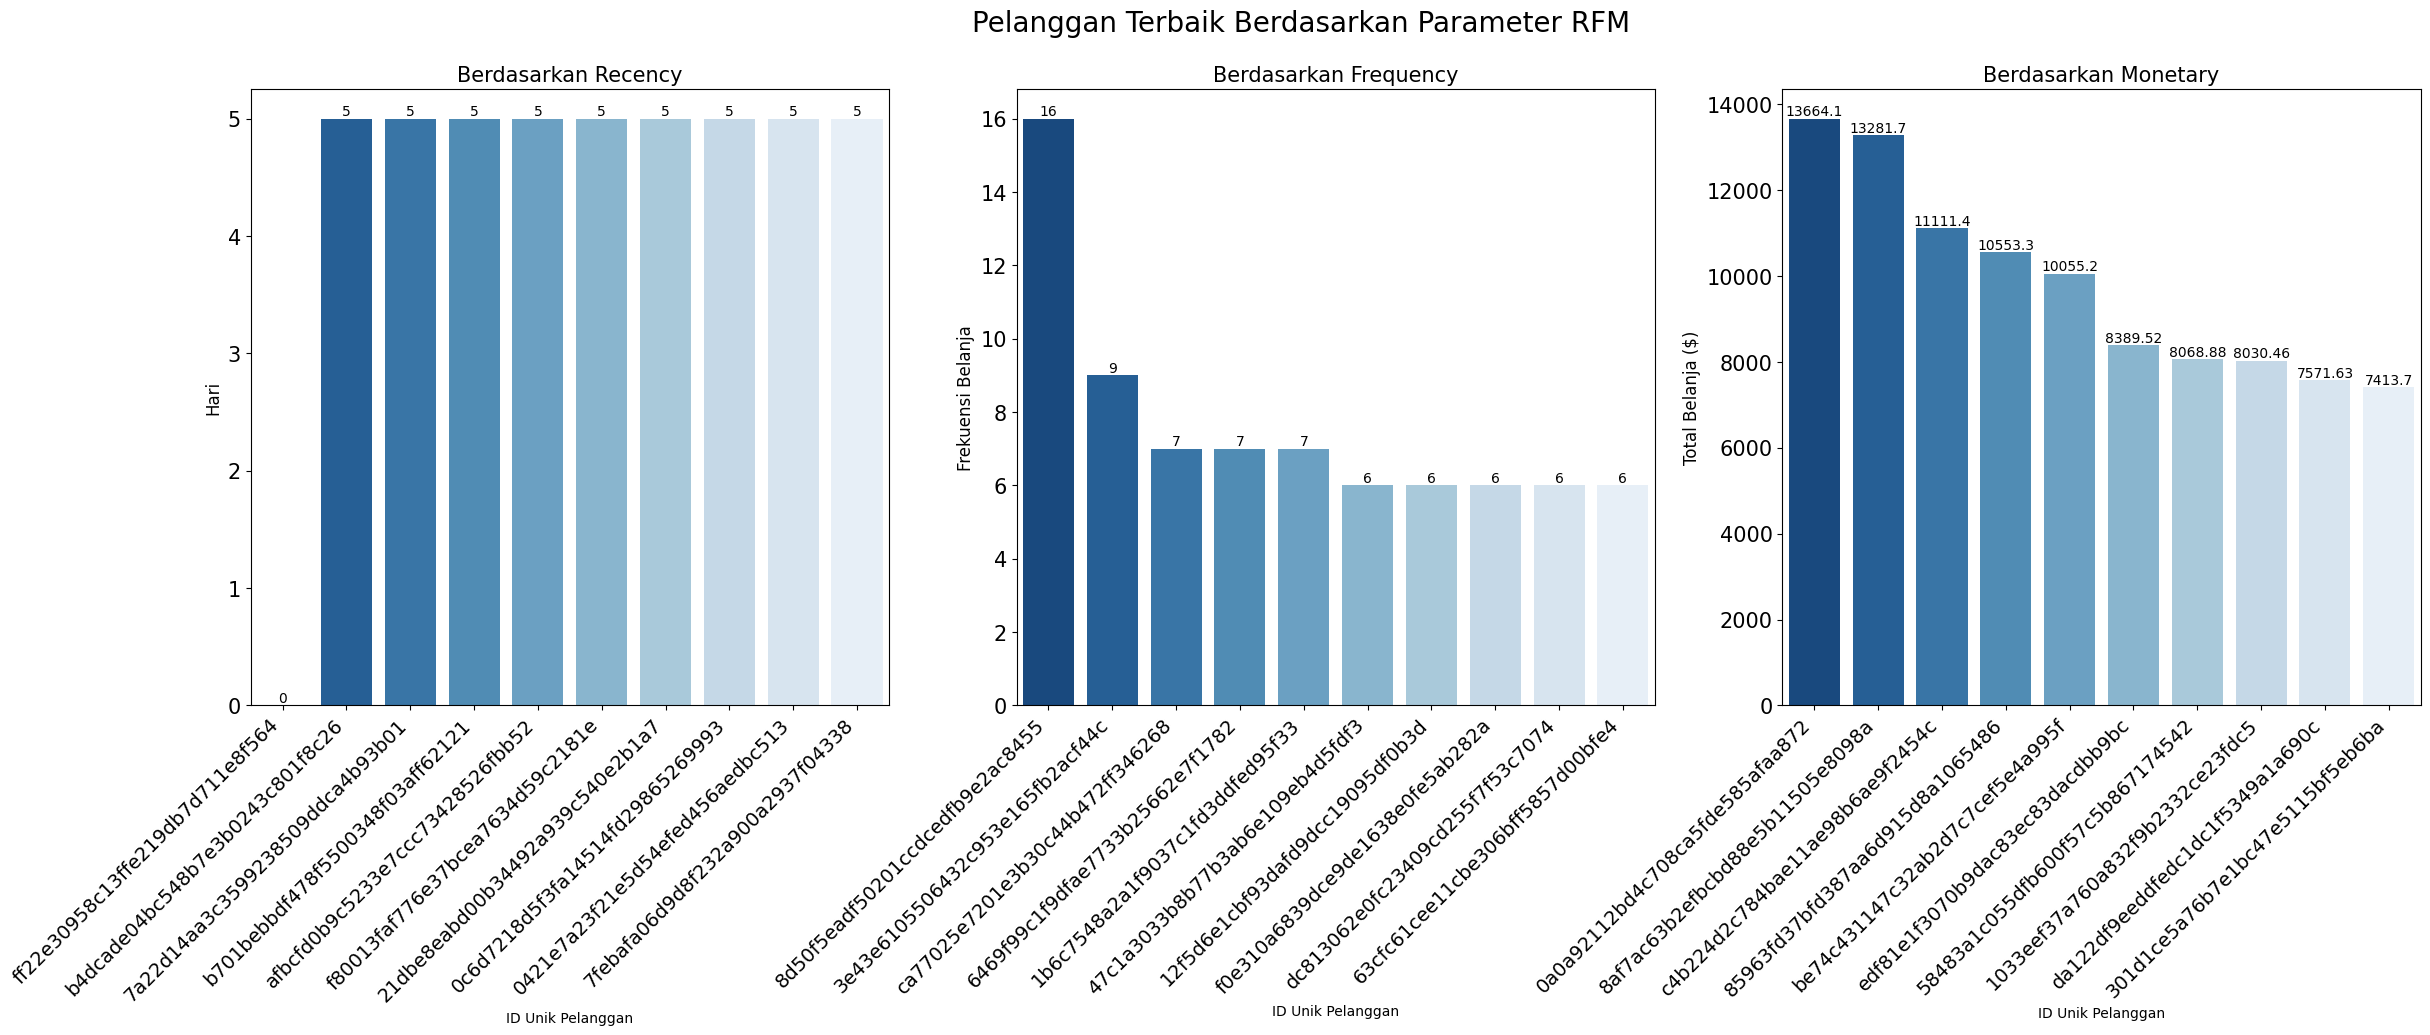

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(28, 8))

sns.barplot(x="customer_unique_id", y="recency", data= df_rfm.sort_values(by='recency', ascending=True).head(10), palette='Blues_r', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_ylabel('Hari', fontsize=12)
ax[0].set_xlabel('ID Unik Pelanggan')
ax[0].set_title("Berdasarkan Recency", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(x="customer_unique_id", y="frequency", data= df_rfm.sort_values(by='frequency', ascending=False).head(10), palette='Blues_r', ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_ylabel('Frekuensi Belanja', fontsize=12)
ax[1].set_xlabel('ID Unik Pelanggan')
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(x="customer_unique_id", y="monetary", data= df_rfm.sort_values(by='monetary', ascending=False).head(10), palette='Blues_r', ax=ax[2])
ax[2].bar_label(ax[2].containers[0])
ax[2].set_ylabel('Total Belanja ($)', fontsize=12)
ax[2].set_xlabel('ID Unik Pelanggan')
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis ='y', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM", fontsize=20)
plt.show()

Ditinjau dari nilai Recencynya, pelanggan dengan ID ff22e30958c13ffe219db7d711e8f564 memiliki nilai recency 0, artinya pelanggan ini baru 0 hari yang lalu berbelanja di Olist Store. Ditinjau dari nilai frekuensi order, pelanggan dengan ID unik 8d50f5eadf50201ccdcedfb9e2ac8455 memiliki frekuensi paling tinggi diantara pelanggan lainnya, yaitu 16. Artinya, pelanggan ini telah 14 kali melakukan order di Olist Store. Terakhir, ditinjau dari nilai monetary (total belanja), pelanggan dengan ID unik 0a0a92112bd4c7008ca5fde585afaa872 memiliki nilai monetary tertinggi dengan nominal uang belanja yang telah dikeluarkannya adalah 13664.1 real.

In [75]:
# memberi rank pada pelanggan berdasarkan skor recency, frequency, dan monetary
df_rfm['R_rank'] = df_rfm['recency'].rank(ascending=False)
df_rfm['F_rank'] = df_rfm['frequency'].rank(ascending=True)
df_rfm['M_rank'] = df_rfm['monetary'].rank(ascending=True)

In [76]:
# normalisasi rank pelanggan
df_rfm['R_rank_norm'] = (df_rfm['R_rank']/df_rfm['R_rank'].max())*100
df_rfm['F_rank_norm'] = (df_rfm['F_rank']/df_rfm['F_rank'].max())*100
df_rfm['M_rank_norm'] = (df_rfm['F_rank']/df_rfm['M_rank'].max())*100

In [77]:
# hapus column R_rank, F_rank, M_rank
df_rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
df_rfm.head()

,customer_unique_id,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,76.165735,48.480781,48.480781
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,75.137656,48.480781,48.480781
2,0000f46a3911fa3c0805444483337064,542,1,86.22,3.562743,48.480781,48.480781
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,28.749882,48.480781,48.480781
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,33.756041,48.480781,48.480781


In [78]:
# membuat RFM Score dengan weighted value
  # weighting masing-masing parameter
df_rfm['RFM_score'] = 0.18*df_rfm['R_rank_norm'] + 0.30 *df_rfm['F_rank_norm'] + 0.52*df_rfm['M_rank_norm']
  # ubah nilai RFM Score menjadi nilai dengan maksimal 5 dan membulatkannya hingga 2 desimal
df_rfm['RFM_score'] = (0.05*df_rfm['RFM_score']).round(2)

In [79]:
df_rfm = df_rfm[['customer_unique_id', 'recency','frequency','monetary','RFM_score']]
df_rfm.head()

,customer_unique_id,recency,frequency,monetary,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,2.67
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,2.66
2,0000f46a3911fa3c0805444483337064,542,1,86.22,2.02
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2.25
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2.29


In [80]:
# memberi rating pada pelanggan untuk melakukan segmentasi
'''RFM Score > 4.0 : Top Customer
4.0 > RFM Score > 3 : High Value Customer
3> RFM Score > 2 : Medium Value Customer
2> RFM Score > 1.5 : Low Value Customer
RFM Score <1.5 : Lost Customer'''

df_rfm["customer_segment"] = np.where(
    df_rfm['RFM_score'] > 4.0, "Top Customer", (np.where(
        df_rfm['RFM_score'] > 3.0, "High Value Customer",(np.where(
            df_rfm['RFM_score'] > 2.0, "Medium Value Customer", np.where(
                df_rfm['RFM_score'] > 1.5, 'Low Value Customer', 'Lost Customer')))))
)

df_rfm.head(10)

,customer_unique_id,recency,frequency,monetary,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,2.67,Medium Value Customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,2.66,Medium Value Customer
2,0000f46a3911fa3c0805444483337064,542,1,86.22,2.02,Medium Value Customer
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2.25,Medium Value Customer
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2.29,Medium Value Customer
5,0004bd2a26a76fe21f786e4fbd80607f,151,1,166.98,2.59,Medium Value Customer
6,00050ab1314c0e55a6ca13cf7181fecf,136,1,35.38,2.63,Medium Value Customer
7,00053a61a98854899e70ed204dd4bafe,187,1,419.18,2.52,Medium Value Customer
8,0005e1862207bf6ccc02e4228effd9a0,548,1,150.12,2.02,Medium Value Customer
9,0005ef4cd20d2893f0d9fbd94d3c0d97,175,1,129.76,2.54,Medium Value Customer


In [81]:
# melihat sebaran segmen pelanggan berdasarkan RFM score
df_rfm.customer_segment.value_counts()

Medium Value Customer    90310
Top Customer              2887
Low Value Customer        1786
Name: customer_segment, dtype: int64

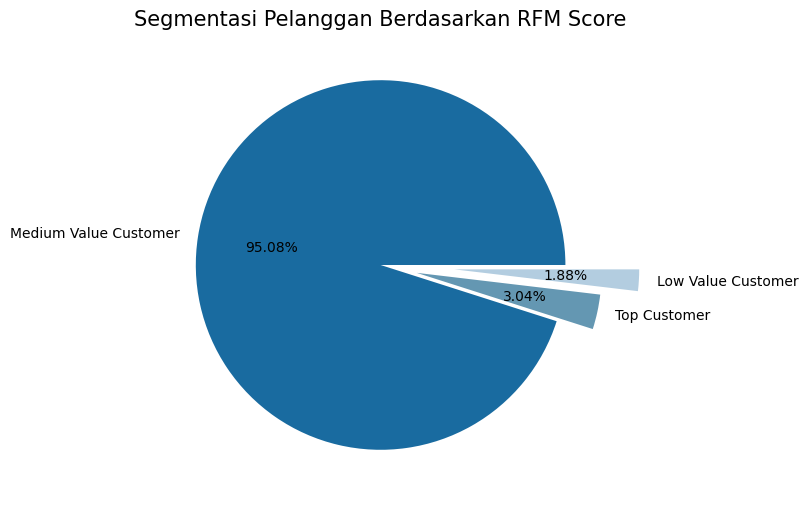

In [82]:
plt.figure(figsize=(6,6))
colors = ["#196ba0", "#6497b2", "#b3cde0"]
plt.pie(
    df_rfm.customer_segment.value_counts(),
    labels= df_rfm.customer_segment.value_counts().index,
    autopct= '%1.2f%%',
    explode = [0, 0.2, 0.4],
    colors= sns.color_palette(colors)
)
plt.title("Segmentasi Pelanggan Berdasarkan RFM Score", loc='center', fontsize=15)
plt.show()

Berdasarkan hasil segmentasi pelanggan dengan analisis RFM menunjukkan bahwa 95,08% pelanggan termasuk dalam segmen Medium Value Customer, lalu sebanyak 3,04% pelanggan termasuk dalam segmen Top Customer, dan 1,88% pelanggan masuk ke dalam segmen Low Value Customer dari total pelanggan 94.983 pelanggan.

## Conclusion




1. Bagaimana sebaran pelanggan Olist Store berdasarkan kota dan negara asalnya?
> Jika dilihat berdasarkan negara asal pelanggan, pelanggan Olist Store paling banyak berasal dari negara Sao Paulo dengan jumlah 39.747 pelanggan. Di urutan kedua diikuti oleh negara Rio de Janeiro	dengan 12241 pelanggan. Urutan ketiga diikuti oleh negara Minas Gerais dengan 11.134 pelanggan.
> Jika dilihat berdasarkan kota asal pelanggan, pelanggan Olist Store paling banyak berasal dari kota Sao Paulo	dengan 14.761 pelanggan. Posisi kedua terbanyak diikuti oleh kota Rip De Janeiro dengan 6.545 pelanggan dan posisi ketiga diikuti kota Belo Horizonte dengan 2.641 pelanggan.

---
2. Kategori produk manakah yang paling sering dibeli dan paling jarang dibeli oleh pelanggan Olist Store?
> 5 Kategori produk yang paling sering dibeli oleh pelanggan Olist Store secara berurut adalah Bed Bath Table dengan 11.805 kali pembelian, Health Beuaty dengan 9.935 kali pembelian, Sports Leisure dengan 8.893 kali pembelian, Furniture Decor dengan 8.707 kali pembelian, Computers Accessories dengan 8036 kali pembelian. Kemudian, 5 kategori produk yang paling sedikit dibeli oleh pelanggan Olist Store secara berurutan adalah Security and Services dengan hanya 2 kali pembelian, Fashion Childrens Clothes dengan 8 kali pembelian, PC Gaming dengan 9 kali pembelian, Cds Dvds Musicals dengan 14 kali pembelian, dan Portable Kitchen and Food Preparation dengan 14 kali pembelian.

---
3. Tipe pembayaran apa saja yang sering digunakan pelanggan untuk bertransaksi di Olist Store?
> Pelanggan Olist Store menggunakan empat tipe pembayaran berbeda untuk melakukan transaksi di Olist Store, yaitu: Credit Card, Boleto, Voucher, dan Debit Card. Berdasarkan empat tipe pembayaran tersebut, 75,3% transaksi dibayar dengan menggunakan Credit Card, 19,5% transaksi dibayar dengan Boleto, 3,7% transaksi dibayar dengan Voucher, dan 1,5% transaksi dibayar dengan Debit Card dari 100.409 transaksi yang terjadi. Artinya, pelanggan Olist Store cenderung menggunakan Credit Card sebagai cara pembayaran mereka.
---

4. Bagaimana perkembangan jumlah order pelanggan dari tahun 2016 hingga 2018 pada setiap bulannya?
> Jumlah order/transaksi pelanggan pada bulan September tahun 2016 hingga November tahun 2017 cenderung meningkat setiap bulannya. Sementara itu, jumlah order pada bulan Desember tahun 2017 hingga bulan September tahun 2018 mengalami fluktuasi yang cenderung stabil. Bulan November tahun 2017 mencapai jumlah order tertinggi dalam periode September tahun 2016 hingga September 2018 dengan total order sebesar 7.421 orderan. Sedangkan, total order terendah terjadi pada bulan November tahun 2016 dengan 0 orderan.

---
5. Bagaimana segmentasi pelanggan Olist Store berdasarkan nilai recency, frequency, dan monetarynya?
> Segmentasi pelanggan Olist Store yang dinilai berdasarkan recency (kapan terakhir kali melakukan order), frequency (frekuensi order), dan monetary (total uang yang dihabiskan untuk melakukan orderan) menunjukkan bahwa 95,08% pelanggan termasuk dalam segmen Medium Value Customer, lalu sebanyak 3,04% pelanggan termasuk dalam segmen Top Customer, dan 1,88% pelanggan masuk ke dalam segmen Low Value Customer dari total pelanggan 94.983 pelanggan.


